In [1]:
#https://www.kaggle.com/datasets/ssarkar445/handwriting-recognitionocr/data

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torch.nn as nn
from tqdm import tqdm

np.random.seed(2569)

In [2]:
IMAGE_WIDTH = 200
IMAGE_HEIGHT = 50
BATCH_SIZE = 16
EPOCHS = 40
LEARNING_RATE = 1e-3

datasets = ['train', 'test', 'validation']
csv_paths = {x: f'ssarkar_data/CSV/written_name_{x}.csv' for x in datasets}
image_dirs = {x: f'ssarkar_data/{x}_v2/{x}/' for x in datasets}
dataset_batch_sizes = {x: BATCH_SIZE * y for x, y in zip(datasets, [1000, 100, 500])}

train_csv, test_csv, validation_csv = [pd.read_csv(csv_paths[x])[:dataset_batch_sizes[x]] for x in datasets]
for i, j in zip(datasets, [train_csv, test_csv, validation_csv]):
    j['FILENAME'] = [f'{image_dirs[i]}{filename}' for filename in j['FILENAME']]

In [3]:
train_names = [str(name) for name in train_csv.IDENTITY.to_numpy()]
unique_chars = set(char for name in train_names for char in name)
print(f'There are {len(unique_chars)} unique characters.')
print(f'These are the unique characters: {unique_chars}')

char_to_num = {x: indx for indx, x in enumerate(unique_chars)}
num_to_char = {char_to_num[x]: x for x in char_to_num}
convert_num_to_char = lambda x : ''.join(map(lambda y : num_to_char[y.item()], x))

max_name_length = max(map(len, train_names))
print(f'The maximum name length is {max_name_length}.')

There are 41 unique characters.
These are the unique characters: {' ', 'B', 's', 'D', 'Q', 'a', 'X', 'p', "'", 'U', 'O', 'P', 'M', '-', 'R', 'S', 'A', 'C', 'r', 'K', 'l', 'V', 'I', 'o', 'Z', 'e', 'L', 'F', 'T', 't', 'G', 'E', 'H', 'n', 'N', 'u', 'c', 'W', 'Y', 'J', 'y'}
The maximum name length is 24.


In [4]:
def convert_image_to_tensor(file_path):
    with Image.open(file_path) as image:
        transform = transforms.Compose([
                transforms.Grayscale(num_output_channels=1),
                transforms.Resize((IMAGE_HEIGHT, IMAGE_WIDTH)),
                transforms.PILToTensor()
        ])
        image_tensor = transform(image)
    return image_tensor

def get_data(file_path, name):
    image = convert_image_to_tensor(file_path)
    if isinstance(name, float):
        return (image, torch.tensor([]))
    char_inds = torch.tensor([char_to_num[x] for x in name])
    return (image, char_inds)



In [5]:
train_csv.head()

,FILENAME,IDENTITY
0,ssarkar_data/train_v2/train/TRAIN_00001.jpg,BALTHAZAR
1,ssarkar_data/train_v2/train/TRAIN_00002.jpg,SIMON
2,ssarkar_data/train_v2/train/TRAIN_00003.jpg,BENES
3,ssarkar_data/train_v2/train/TRAIN_00004.jpg,LA LOVE
4,ssarkar_data/train_v2/train/TRAIN_00005.jpg,DAPHNE


In [6]:


zip(train_csv['FILENAME'].to_list(), train_csv['IDENTITY'].to_list())

In [7]:
unpack_csv = lambda csv_file : (csv_file['FILENAME'].to_list(), csv_file['IDENTITY'].to_list())

train_dataset = list(map(get_data, *unpack_csv(train_csv)))
test_dataset = list(map(get_data, *unpack_csv(test_csv)))
validation_dataset = list(map(get_data, *unpack_csv(validation_csv)))


In [16]:
def show_images(dataset, grid=(4, 4), figsize=(25, 8)):
    plt.figure(figsize=figsize)
    n_rows, n_columns = grid
    data_iter = iter(dataset)
    for i in range(n_rows * n_columns):
        image, label = next(data_iter)
        text_label = convert_num_to_char(label)
        ax = plt.subplot(n_rows, n_columns, i+1)
        ax.set_title(text_label)
        plt.imshow(image.squeeze(), cmap='gray')
        plt.axis('off')
    plt.show()

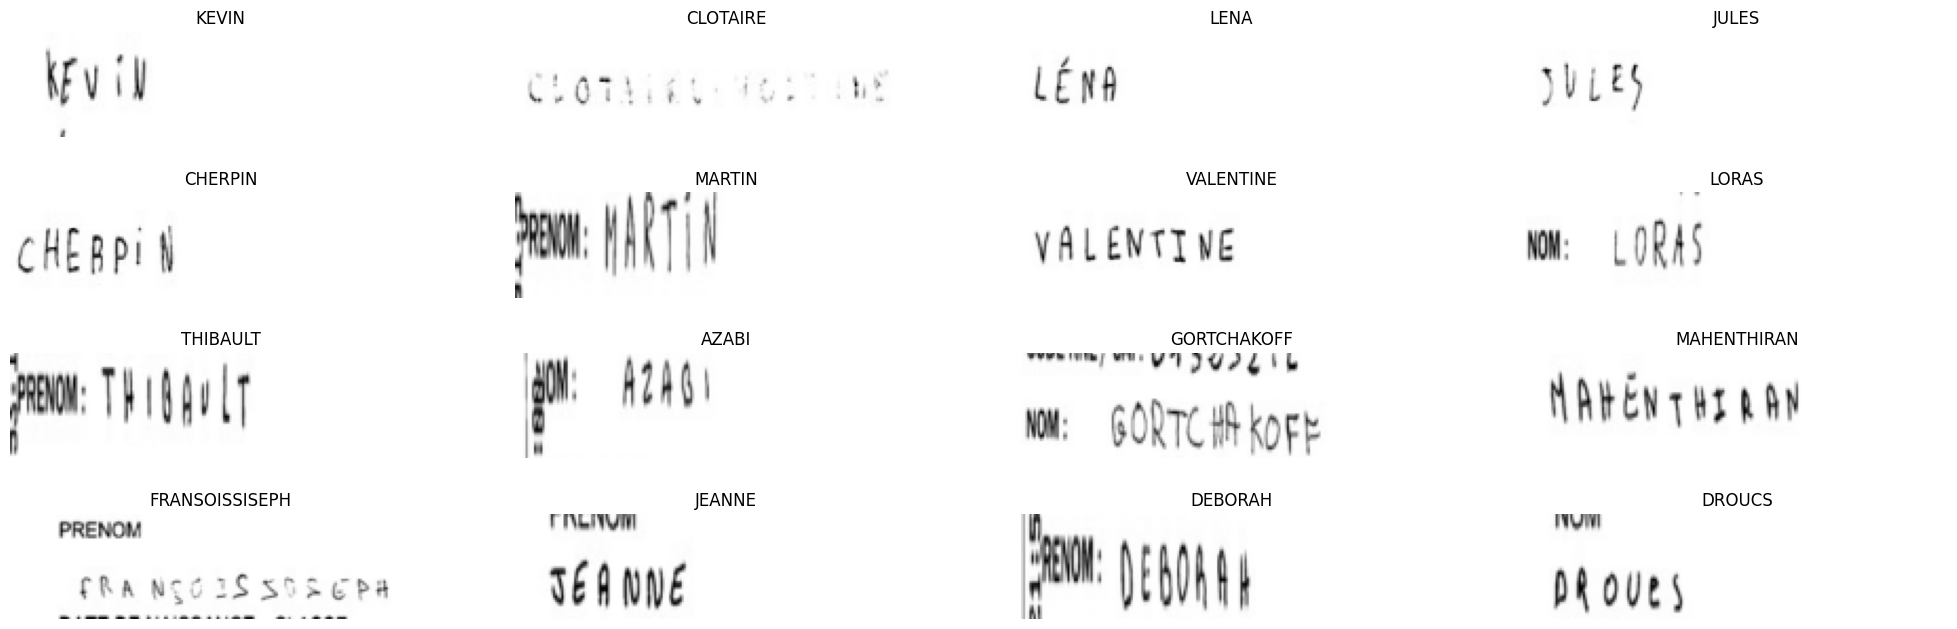

In [20]:
show_images(test_dataset)

In [118]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(

        )
    
    def forward(self, x):
        

tensor([[[255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         ...,
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255],
         [255, 255, 255,  ..., 255, 255, 255]]], dtype=torch.uint8)

In [155]:
input = torch.randn(64, 100, 56, 5)
m = nn.Flatten()
print(m)
output = m(input)
print(output.size())

Flatten(start_dim=1, end_dim=-1)
torch.Size([64, 28000])


In [131]:
input = torch.randn(2, 2, 2, 2)
print(input)

tensor([[[[ 0.6946,  0.5454],
          [ 0.7913,  2.2698]],

         [[ 0.9228, -0.7224],
          [-0.3152, -2.0028]]],


        [[[ 0.5147, -0.2864],
          [-0.6639, -0.2652]],

         [[ 0.2029,  0.2203],
          [ 0.3280,  0.3123]]]])


In [154]:
for i in range(4):
    for j in range(4):
        if j < i:
            continue
        m = nn.Flatten(i, j)
        print(i, j)
        print(m(input))
        print(m(input).size(), '\n')

0 0
tensor([[[[ 0.6946,  0.5454],
          [ 0.7913,  2.2698]],

         [[ 0.9228, -0.7224],
          [-0.3152, -2.0028]]],


        [[[ 0.5147, -0.2864],
          [-0.6639, -0.2652]],

         [[ 0.2029,  0.2203],
          [ 0.3280,  0.3123]]]])
torch.Size([2, 2, 2, 2]) 

0 1
tensor([[[ 0.6946,  0.5454],
         [ 0.7913,  2.2698]],

        [[ 0.9228, -0.7224],
         [-0.3152, -2.0028]],

        [[ 0.5147, -0.2864],
         [-0.6639, -0.2652]],

        [[ 0.2029,  0.2203],
         [ 0.3280,  0.3123]]])
torch.Size([4, 2, 2]) 

0 2
tensor([[ 0.6946,  0.5454],
        [ 0.7913,  2.2698],
        [ 0.9228, -0.7224],
        [-0.3152, -2.0028],
        [ 0.5147, -0.2864],
        [-0.6639, -0.2652],
        [ 0.2029,  0.2203],
        [ 0.3280,  0.3123]])
torch.Size([8, 2]) 

0 3
tensor([ 0.6946,  0.5454,  0.7913,  2.2698,  0.9228, -0.7224, -0.3152, -2.0028,
         0.5147, -0.2864, -0.6639, -0.2652,  0.2029,  0.2203,  0.3280,  0.3123])
torch.Size([16]) 

1 1
tensor([[[[ 

In [137]:
input.size()

torch.Size([2, 2, 2, 2])